 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_csv_path = ("whale_returns.csv")
whale_df = pd.read_csv(whale_csv_path, index_col = 'Date', parse_dates = True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
# Count nulls
null_counts = whale_df.isnull().sum()
print(null_counts)

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [4]:
# Drop nulls
whale_df.dropna(inplace = True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_csv_path = ("algo_returns.csv")
algo_df = pd.read_csv(algo_csv_path, index_col = 'Date', parse_dates = True)
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [6]:
# Count nulls
null_counts = algo_df.isnull().sum()
print(null_counts)

Algo 1    0
Algo 2    6
dtype: int64


In [7]:
# Drop nulls
algo_df.dropna(inplace = True)
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
SP500_csv_path = ("sp500_history.csv")
SP500_df = pd.read_csv(SP500_csv_path, index_col = 'Date', parse_dates = True)

SP500_df.sort_index(ascending = True, inplace = True)
# Needed to sort because 2019 dates were in header instead of 2012
SP500_df

C:\Users\brigi\AppData\Local\Temp\ipykernel_42632\1880015815.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  SP500_df = pd.read_csv(SP500_csv_path, index_col = 'Date', parse_dates = True)


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [9]:
# Check Data Types
SP500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
SP500_df['Close'] = SP500_df['Close'].str.replace('$', '').astype(float)

print("DataFrame with fixed data types:")
print(SP500_df)
print("Data types:")
SP500_df.dtypes


DataFrame with fixed data types:
              Close
Date               
2012-10-01  1444.49
2012-10-02  1445.75
2012-10-03  1450.99
2012-10-04  1461.40
2012-10-05  1460.93
...             ...
2019-04-16  2907.06
2019-04-17  2900.45
2019-04-18  2905.03
2019-04-22  2907.97
2019-04-23  2933.68

[1649 rows x 1 columns]
Data types:


Close    float64
dtype: object

In [11]:
# Sort DataFrame by date
SP500_df = SP500_df.sort_values(by = 'Date')

In [12]:
# Calculate Daily Returns
SP500_df_returns = SP500_df['Close'].pct_change()

In [13]:
# Drop nulls
SP500_df_returns.dropna(inplace = True)

In [14]:
# Rename `Close` Column to be specific to this portfolio.
SP500_df.rename(columns = {'Close': 'Portfolio_Close'}, inplace=True)

print("DataFrame with renamed column:")
print(SP500_df)

DataFrame with renamed column:
            Portfolio_Close
Date                       
2012-10-01          1444.49
2012-10-02          1445.75
2012-10-03          1450.99
2012-10-04          1461.40
2012-10-05          1460.93
...                     ...
2019-04-16          2907.06
2019-04-17          2900.45
2019-04-18          2905.03
2019-04-22          2907.97
2019-04-23          2933.68

[1649 rows x 1 columns]


Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, SP500_df_returns], axis = 1, join = "inner")
combined_df = combined_df.rename(columns={'Close': "SP500 Daily Returns"})
combined_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

Performance Analysis

Calculate and Plot the daily returns.

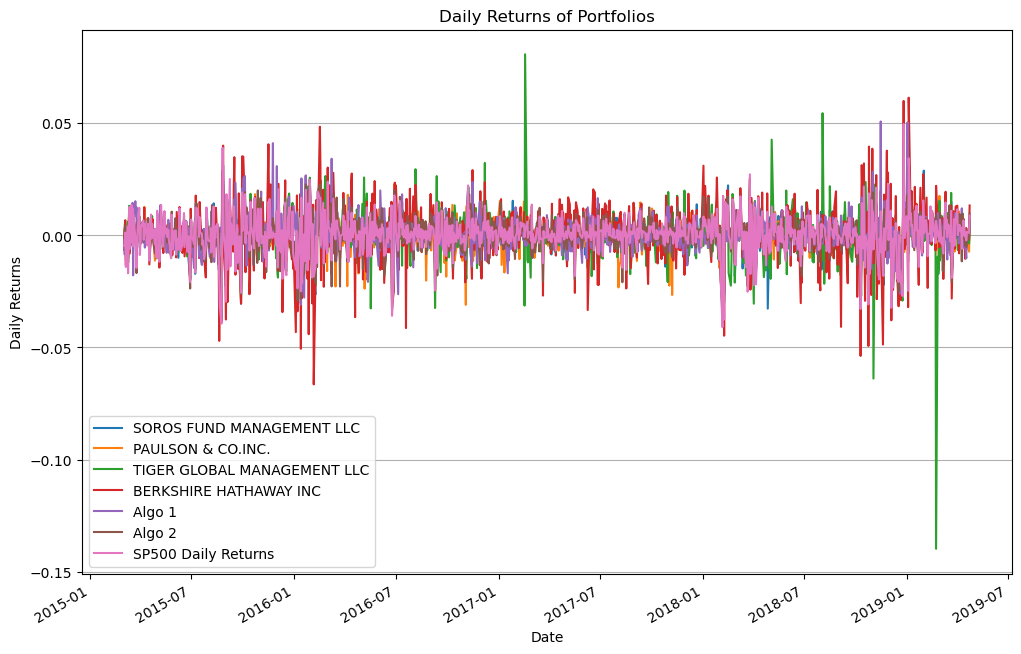

In [16]:
# Plot daily returns of all portfolios
combined_df.plot

combined_df.plot(figsize = (12, 8), title = 'Daily Returns of Portfolios')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.grid (axis = 'y')
plt.legend()
plt.show()


Calculate and Plot cumulative returns.

<Figure size 1200x800 with 0 Axes>

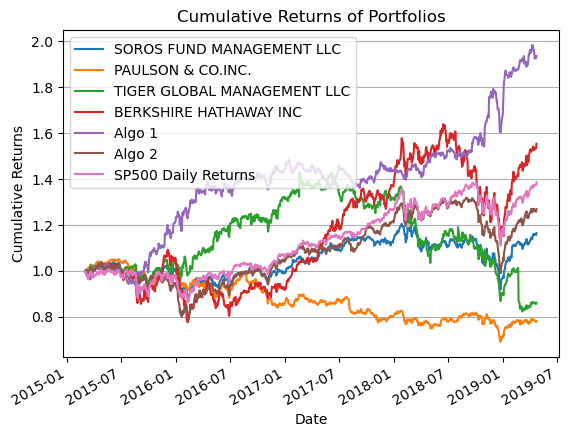

In [17]:
# Convert all columns to numeric; calculate and plot cumulative returns
combined_df = combined_df.apply(pd.to_numeric, errors = 'coerce')
cumulative_returns = (1 + combined_df).cumprod()

# Plot cumulative returns
plt.figure(figsize = (12, 8))
cumulative_returns.plot()
plt.title('Cumulative Returns of Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid (axis = 'y')
plt.legend()
plt.show()



---

Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

Create a box plot for each portfolio


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


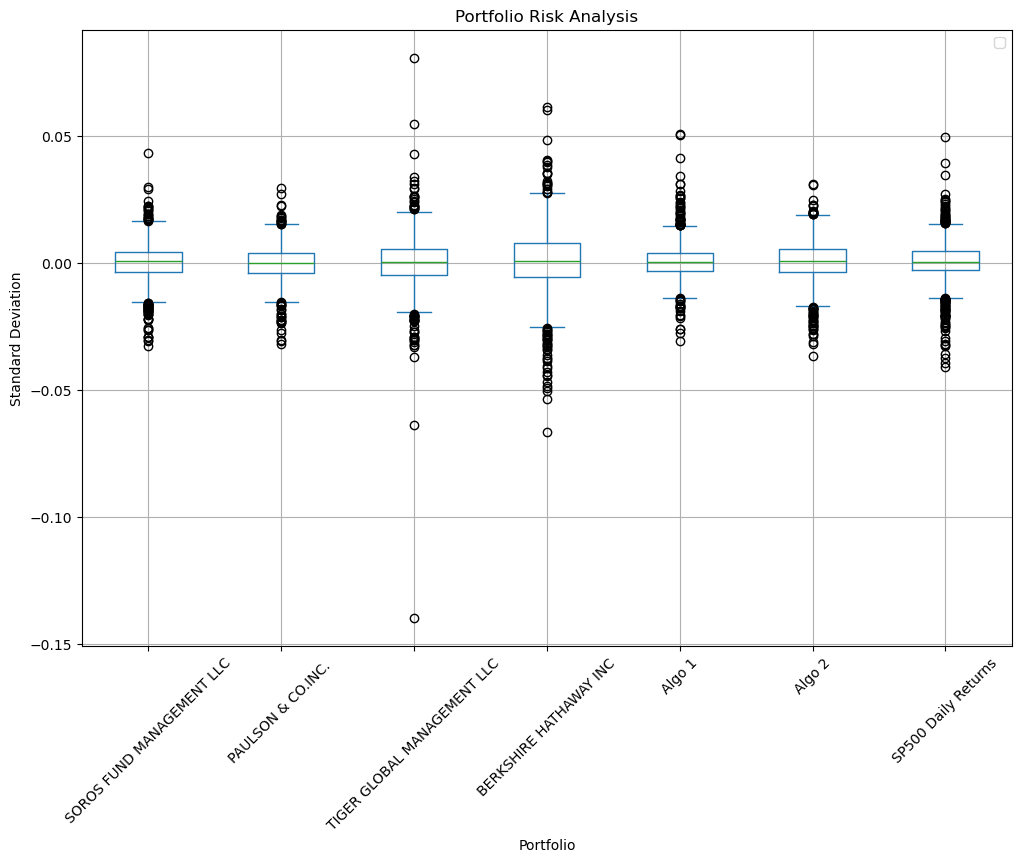

In [18]:
# Box plot to visually show risk
boxplot = combined_df.plot(kind = 'box', figsize = (12,8))
plt.xticks(rotation = 45)
plt.title('Portfolio Risk Analysis')
plt.xlabel('Portfolio')
plt.ylabel('Standard Deviation')
plt.grid(True)
plt.legend()
plt.show()

Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
port_volatility = combined_df.std()
port_volatility

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500 Daily Returns            0.008554
dtype: float64

Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate the daily standard deviation of S&P 500
# Determine which portfolios are riskier than the S&P 500

SP500_df = combined_df.std()
riskier_port = port_volatility[port_volatility > port_volatility['SP500 Daily Returns']]

print("Portfolios Riskier Than SP500:")
print(riskier_port)

Portfolios Riskier Than SP500:
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
combined_ann_std = combined_df.std() * np.sqrt(252)

print(combined_ann_std)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500 Daily Returns            0.135786
dtype: float64


---

Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

Calculate and plot rolling `std` for all portfolios with 21-day window

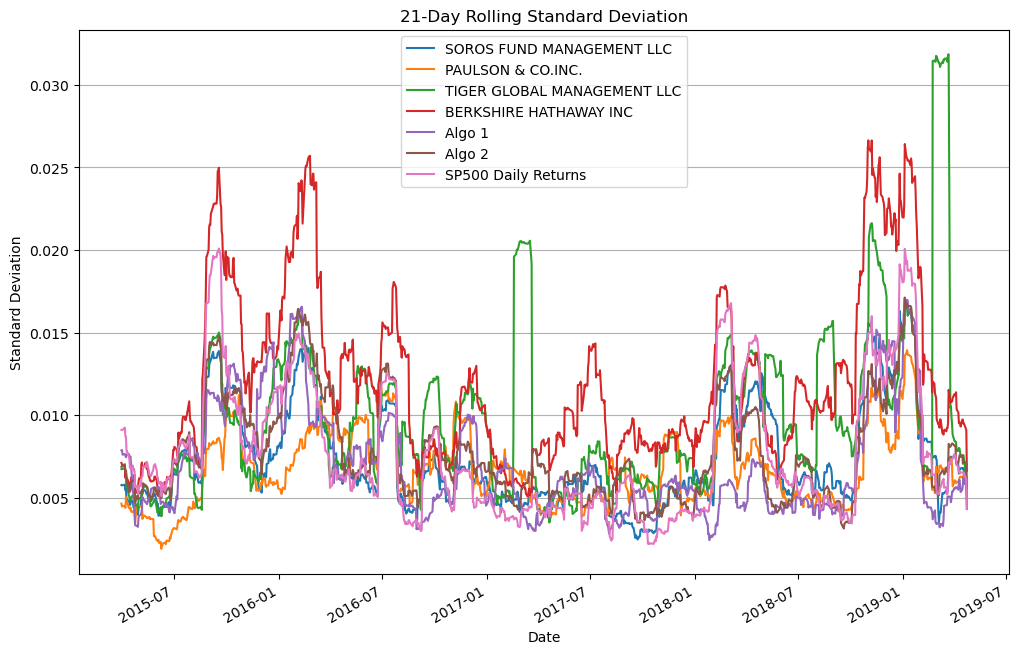

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
roll_std_21day = combined_df.rolling(window = 21).std()

# Plot the rolling standard deviation
roll_std_21day.plot(figsize = (12,8))

plt.title('21-Day Rolling Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.grid (axis = 'y')
plt.legend()
plt.show()


Calculate and plot the correlation

Text(0.5, 1.0, 'Correlation')

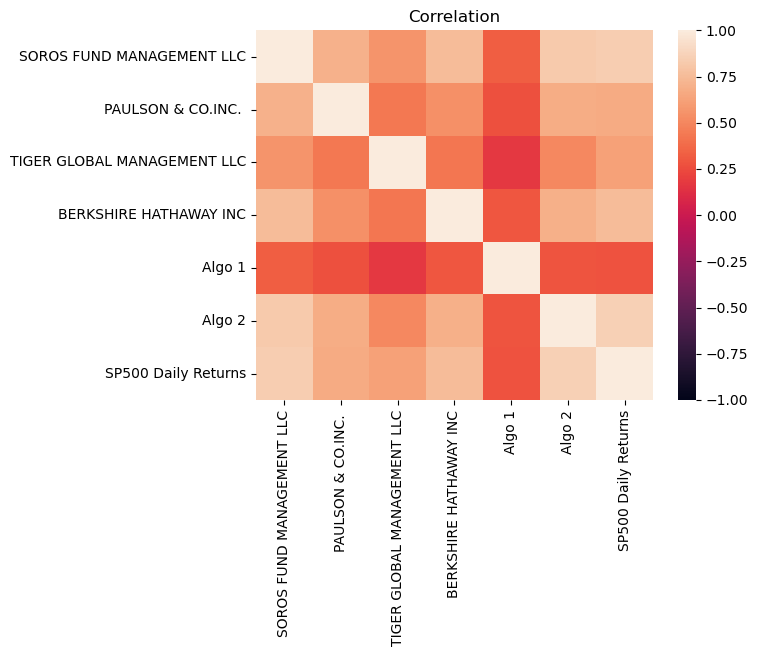

In [23]:
# Calculate the correlation
correlation = combined_df.corr()

# Display the correlation matrix
import seaborn as sns

sns.heatmap(correlation, vmin = -1, vmax = 1)
plt.title('Correlation')

Calculate and Plot Beta for a chosen portfolio and the S&P 500

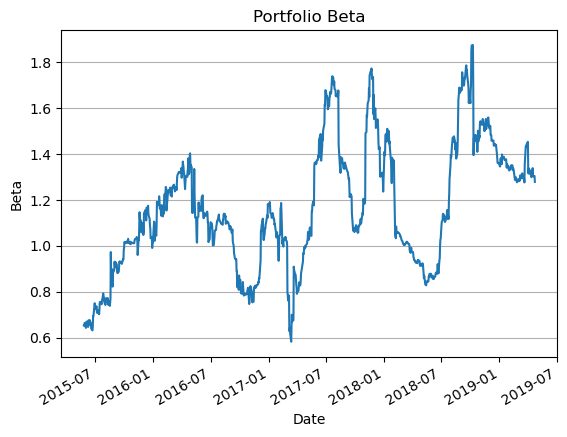

In [24]:
# Calculate covariance of a single portfolio
roll_covar = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window = 60).cov(combined_df['SP500 Daily Returns'])
roll_var = combined_df['SP500 Daily Returns'].rolling(window = 60).var()

roll_beta = roll_covar / roll_var

# Plot beta trend
roll_beta.plot()
plt.xlabel('Date')
plt.ylabel('Beta')
plt.title('Portfolio Beta')
plt.grid (axis = 'y')
plt.show()

Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [25]:
# Use `ewm` to calculate the rolling window
roll_window = combined_df.ewm(halflife = 21).std()

print(roll_window)

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                        NaN                 NaN   
2015-03-04                   0.002472            0.005814   
2015-03-05                   0.002677            0.004968   
2015-03-06                   0.005349            0.004615   
2015-03-09                   0.004638            0.004471   
...                               ...                 ...   
2019-04-16                   0.007632            0.006846   
2019-04-17                   0.007547            0.006846   
2019-04-18                   0.007424            0.006737   
2019-04-22                   0.007336            0.006764   
2019-04-23                   0.007294            0.006682   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                          NaN             

---

Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
combined_ave_ann_ret = combined_df.mean() * 252
combined_sharpe_ratios = combined_ave_ann_ret / combined_ann_std

combined_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500 Daily Returns            0.648267
dtype: float64

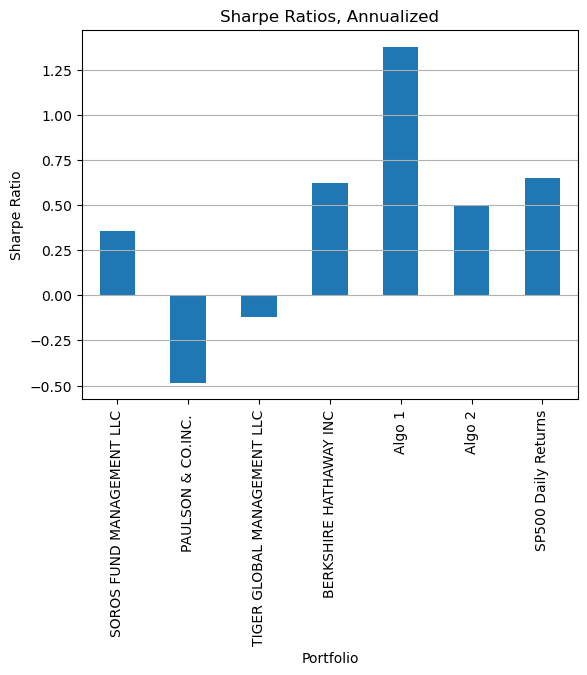

In [27]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe_ratios.plot(kind = 'bar')
plt.xlabel('Portfolio')
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratios, Annualized')
plt.grid (axis = 'y')
plt.show()

Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios:

In [28]:
# Based on Sharpe Ratio and volatility, Algo 1 significantly outperformed the benchmark ("SP500 Daily Returns") with lower-than-benchmark volatility. Every other portfolio underperformed, with Berkshire Hathaway Inc just barely meeting the benchmark performance (0.621810 :  0.648267, respectively), despite having higher volatility than the benchmark.

---

Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks (provided) with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [29]:
# Reading data from 1st stock
aapl_df = pd.read_csv("aapl_historical.csv", index_col = 'Trade DATE', parse_dates = True)
aapl_df.sort_index(ascending = True, inplace = True)

aapl_df.head ()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [30]:
# Reading data from 2nd stock
goog_df = pd.read_csv("goog_historical.csv", index_col = 'Trade DATE', parse_dates = True)
goog_df.sort_index(ascending = True, inplace = True)

goog_df

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59
...,...,...
2019-05-03,GOOG,1185.40
2019-05-06,GOOG,1189.39
2019-05-07,GOOG,1174.10


In [31]:
# Reading data from 3rd stock
cost_df = pd.read_csv("cost_historical.csv", index_col = 'Trade DATE', parse_dates = True)
cost_df.sort_index(ascending = True, inplace = True)

cost_df

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60
...,...,...
2019-05-03,COST,244.62
2019-05-06,COST,244.23
2019-05-07,COST,240.18


In [32]:
# Combine all stocks in a single DataFrame
custom_port_df = pd.concat([aapl_df ['NOCP'], cost_df ['NOCP'], goog_df ['NOCP']],
                           axis = 1,
                           keys = ['AAPL Close', 'COST Close', 'GOOG Close'])

custom_port_df

,AAPL Close,COST Close,GOOG Close
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [33]:
# Reset Date index
# Already reset individually during reading code blocks
custom_port_df = custom_port_df.sort_index()

custom_port_df

,AAPL Close,COST Close,GOOG Close
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [34]:
# Reorganize portfolio data by having a column per symbol
## Already organized when stocks were combined

In [35]:
# Calculate daily returns; drop NANs
custom_port_returns = custom_port_df.pct_change().dropna()

custom_port_returns

,AAPL Close,COST Close,GOOG Close
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339
...,...,...,...
2019-05-03,0.012431,0.007953,0.019602
2019-05-06,-0.015443,-0.001594,0.003366
2019-05-07,-0.026957,-0.016583,-0.012855


Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_port_weighted_ret = custom_port_returns.dot(weights)

custom_port_weighted_ret

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [37]:
# Join your returns DataFrame to the original returns DataFrame
combined_df['Custom Portfolio'] = custom_port_weighted_ret

combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Daily Returns,Custom Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,NaN
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545


In [38]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
total_port_ret_df = combined_df.dropna()

total_port_ret_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Daily Returns,Custom Portfolio
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545


Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [39]:
# Calculate the annualized `std`
total_port_ann_std = total_port_ret_df.std() * np.sqrt(252)

print(total_port_ann_std)

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
SP500 Daily Returns            0.152054
Custom Portfolio               0.211496
dtype: float64


Calculate and plot rolling `std` with 21-day window

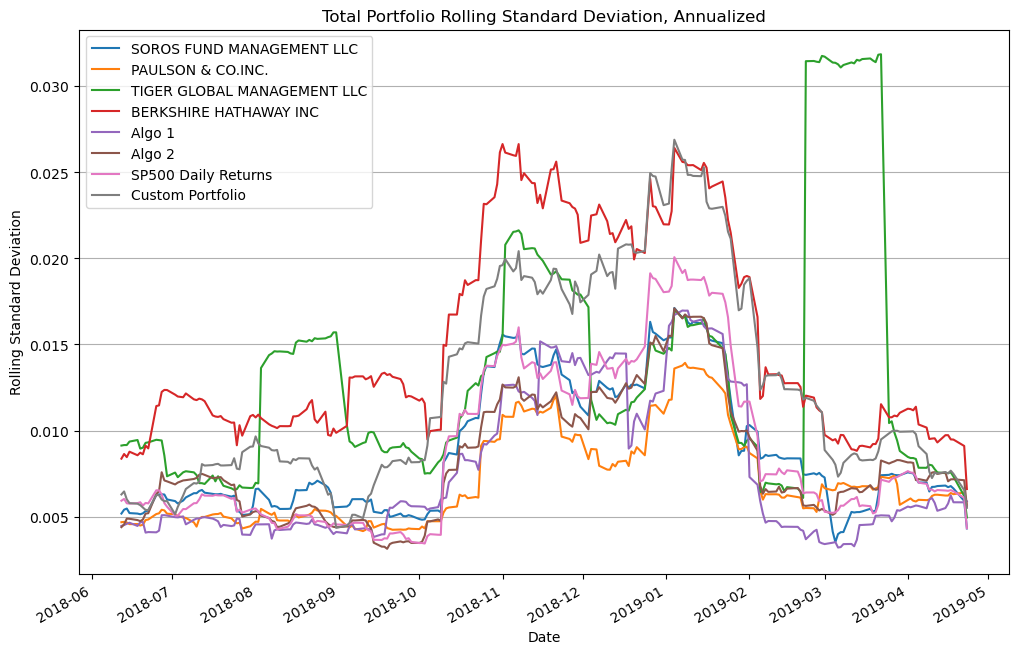

In [40]:
# Calculate rolling standard deviation
total_port_ret_df.rolling(window = 21).std().plot(figsize = (12,8))

plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')
plt.title('Total Portfolio Rolling Standard Deviation, Annualized')
plt.grid (axis = 'y')
plt.show()

Calculate and plot the correlation

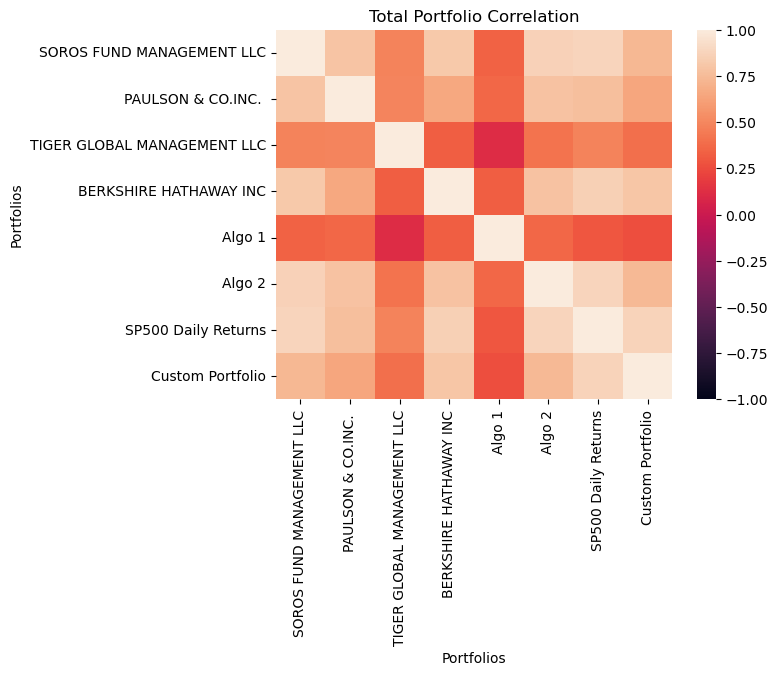

In [41]:
# Calculate and plot the correlation
correlation = total_port_ret_df.corr()

sns.heatmap(correlation, vmin = -1, vmax = 1)
plt.xlabel('Portfolios')
plt.ylabel('Portfolios')
plt.title('Total Portfolio Correlation')
plt.show()

Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    1.173574
2019-04-17    1.138133
2019-04-18    1.138551
2019-04-22    1.137941
2019-04-23    1.129204
Length: 1043, dtype: float64


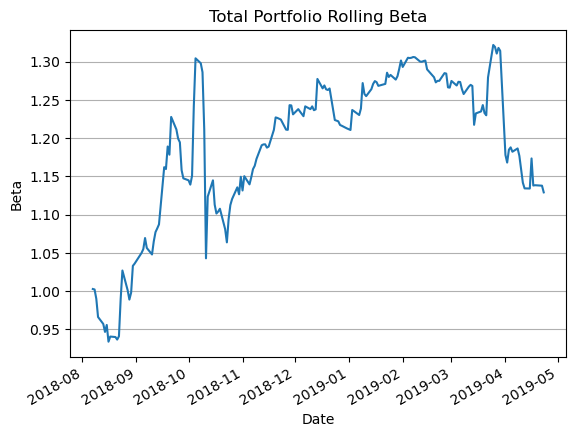

In [42]:
# Calculate and plot Beta
total_roll_covar = total_port_ret_df['Custom Portfolio'].rolling(window = 60).cov(combined_df['SP500 Daily Returns'])
total_roll_var = total_port_ret_df['SP500 Daily Returns'].rolling(window = 60).var()

total_roll_beta = total_roll_covar / total_roll_var
print(total_roll_beta)

total_roll_beta.plot()
plt.xlabel('Date')
plt.ylabel('Beta')
plt.title('Total Portfolio Rolling Beta')
plt.grid (axis = 'y')
plt.show()

Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [43]:
# Calculate Annualized Sharpe Ratios
total_ave_ann_ret = total_port_ret_df.mean() * 252

total_port_sharpe_ratio = total_ave_ann_ret / total_port_ann_std
total_port_sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
SP500 Daily Returns            0.584820
Custom Portfolio               0.933123
dtype: float64

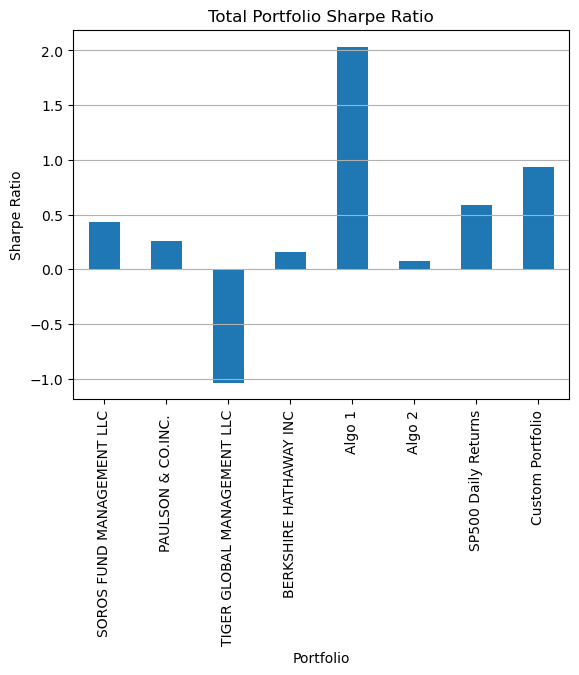

In [44]:
# Visualize the sharpe ratios as a bar plot
total_port_sharpe_ratio.plot(kind = 'bar')

plt.xlabel('Portfolio')
plt.ylabel('Sharpe Ratio')
plt.title('Total Portfolio Sharpe Ratio')
plt.grid (axis = 'y')
plt.show()

How does your portfolio do?

In [45]:
# While Algo 1 still significantly outperformed every portfolio, including the benchmark ("SP500 Daily Returns"), the Custom Portfolio also outperformed the benchmark and the other portfolios, with the exception of Algo 1.
# When comparing volatility, Custom Portfolio had a higher standard deviation than Algo 1, so overall, Algo 1 would perform comparatively better than every other portfolio. Custom Portfolio may outperform the benchmark, but based on risk-adjustment, it has higher volatility than Algo 1 and underperforms with respect to Algo 1.